In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
119,20.0,4,114.0,91.0,2582.0,14.0,73,2
198,33.0,4,91.0,53.0,1795.0,17.4,76,3
98,16.0,6,250.0,100.0,3278.0,18.0,73,1
311,32.1,4,98.0,70.0,2120.0,15.5,80,1
34,16.0,6,225.0,105.0,3439.0,15.5,71,1


<Axes: >

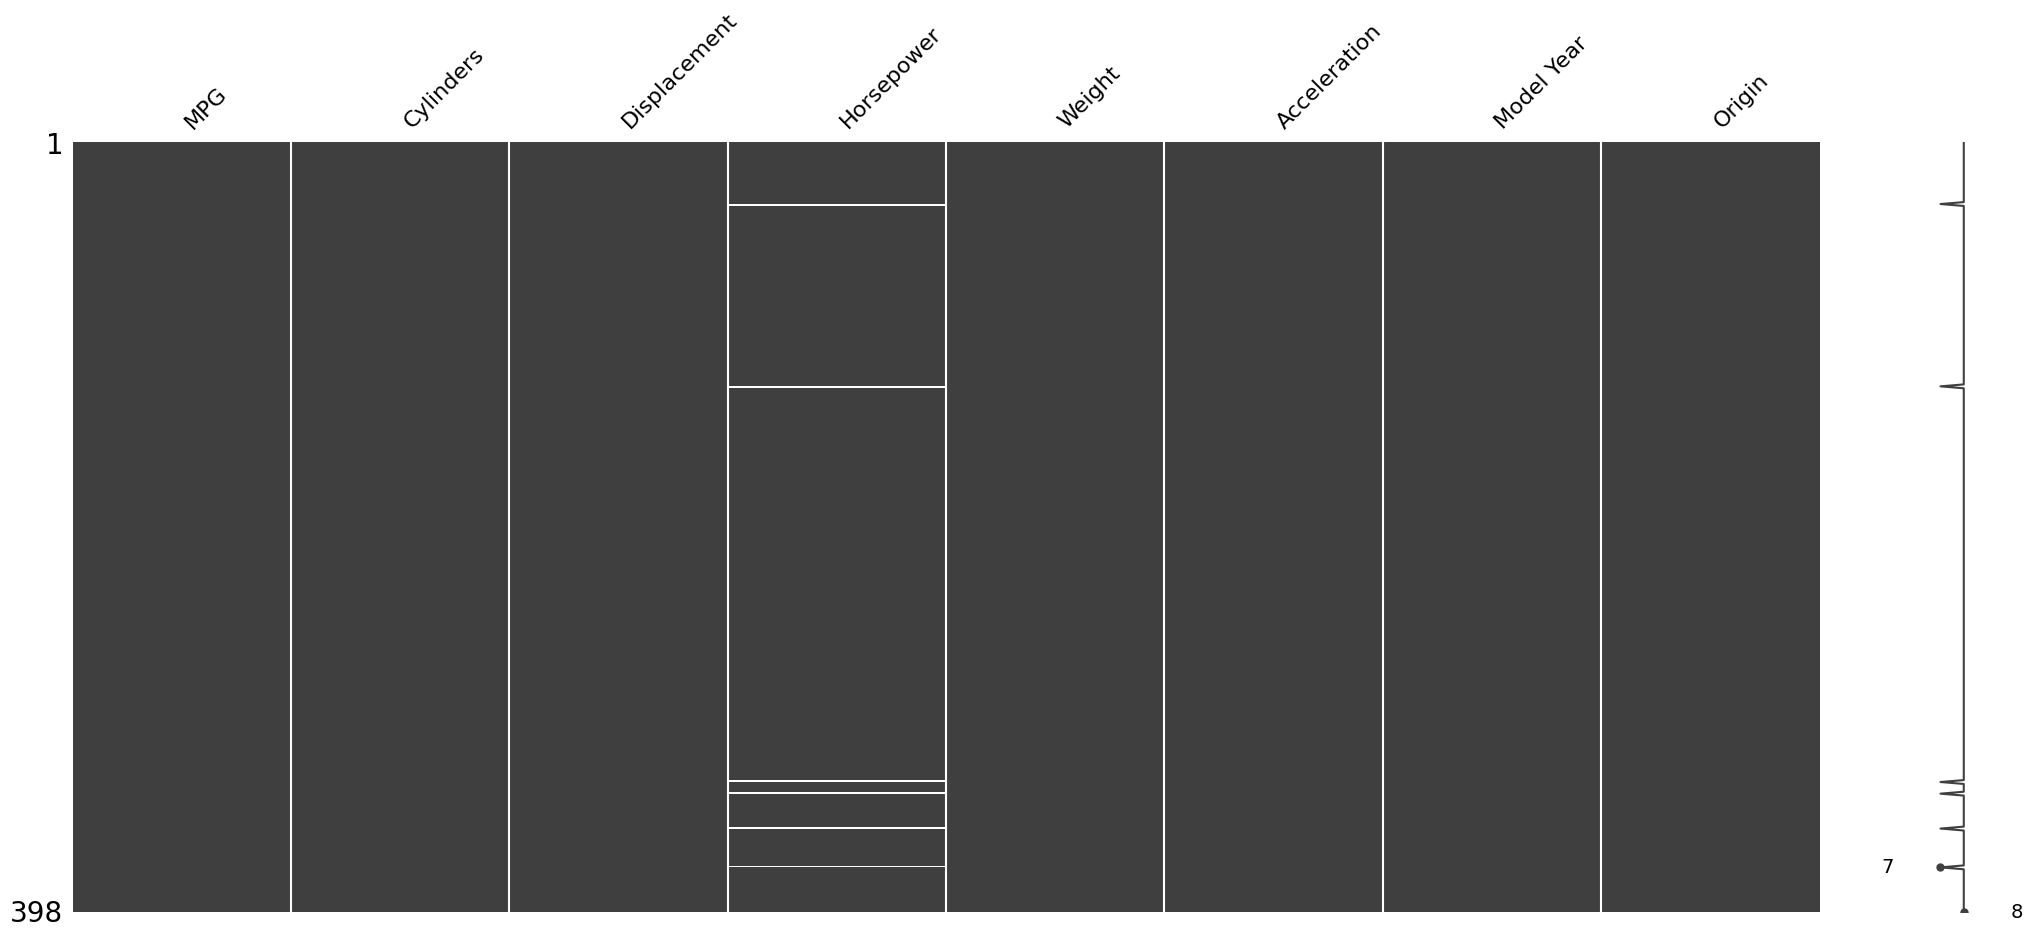

In [ ]:
import missingno
missingno.matrix(dataset)

In [ ]:
horsepower_mean=dataset.Horsepower.mean()
dataset.Horsepower=dataset.Horsepower.fillna(horsepower_mean)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

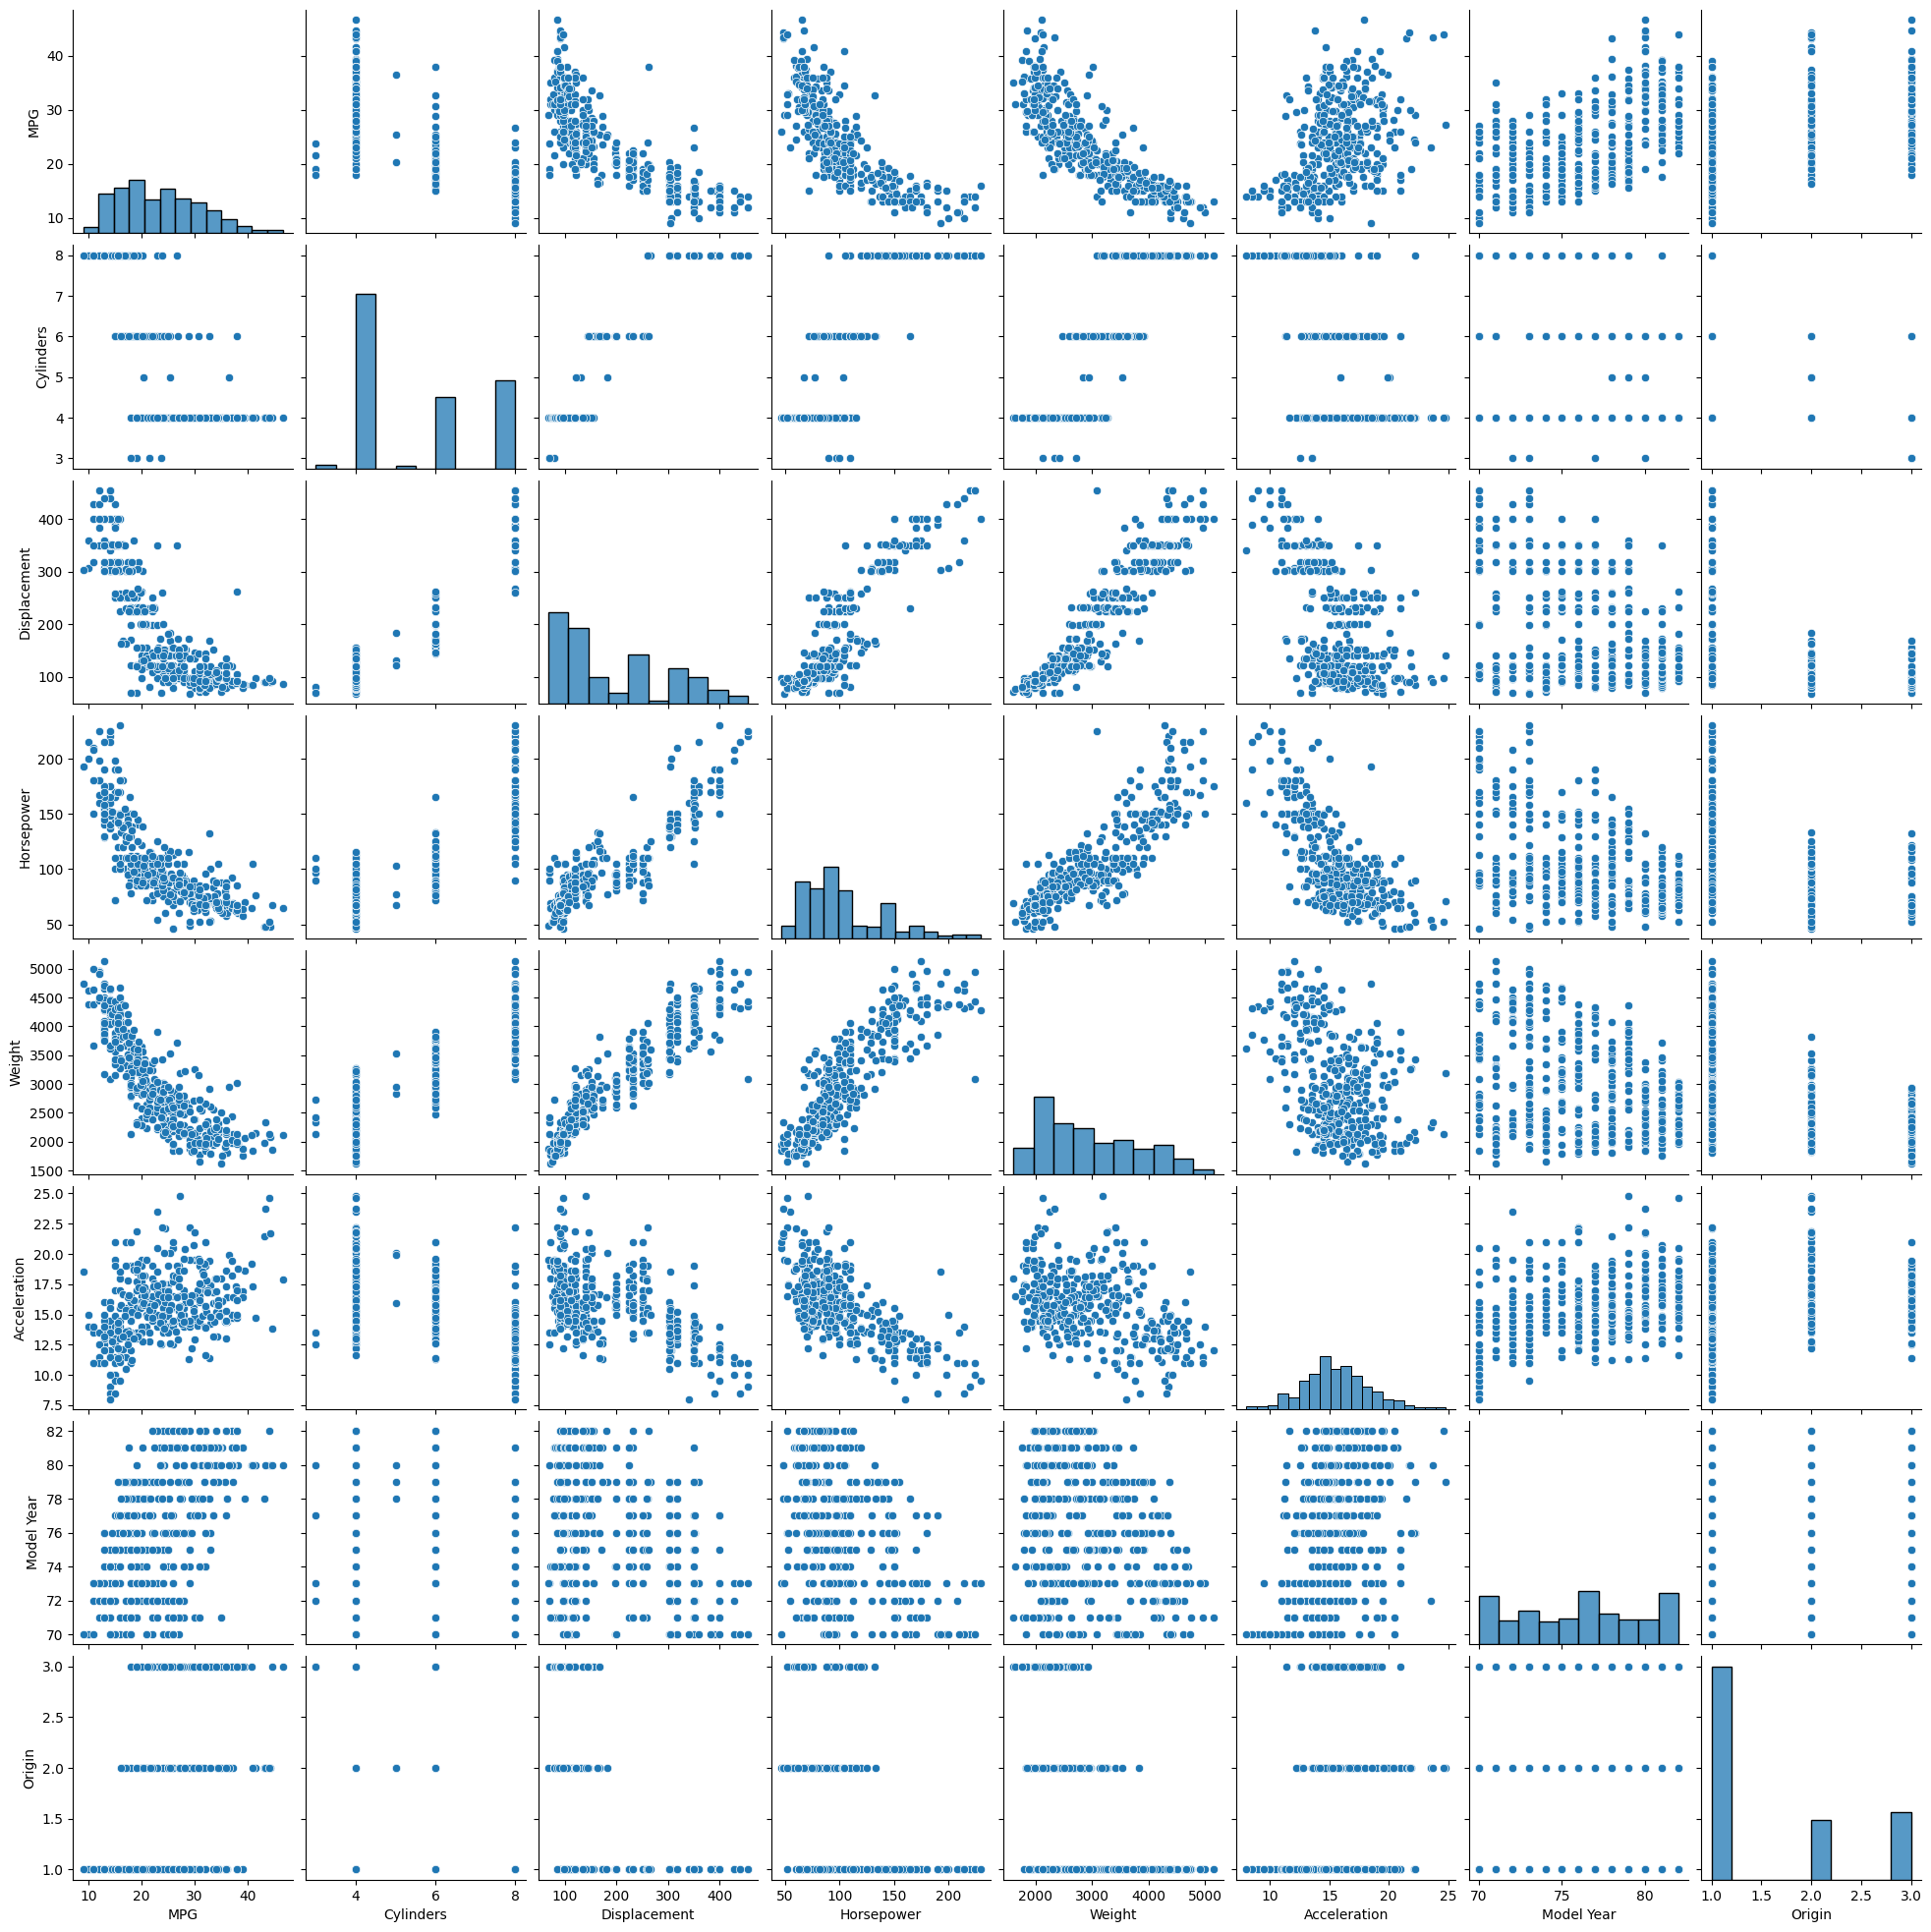

In [ ]:
sns.pairplot(dataset)

<Axes: >

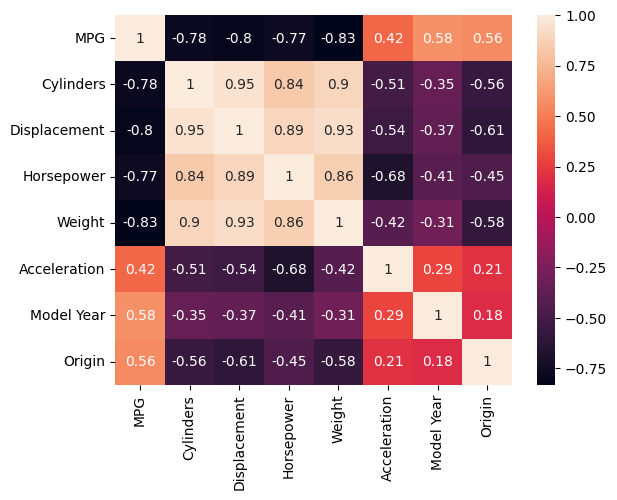

In [ ]:
sns.heatmap(data=dataset.corr(),annot=True)

# Data preparation

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [ ]:
X=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year','Europe','Japan','USA']]
y=dataset['MPG']

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# use single-variable input to fit linear regression model

 i choose the Weight to be the feature as it have best linear relation with the label (MPG)

In [ ]:
X_weight_train=X_train['Weight'].values
X_weight_test=X_test['Weight'].values

In [ ]:
reg = LinearRegression().fit(X_weight_train.reshape(-1,1), y_train)
reg.score(X_weight_test.reshape(-1,1), y_test)

0.6929219452623132

In [ ]:
print("slope",reg.coef_)
print("intercept",reg.intercept_)

slope [-0.00771161]
intercept 46.4959425909595


<Axes: xlabel='Weight', ylabel='MPG'>

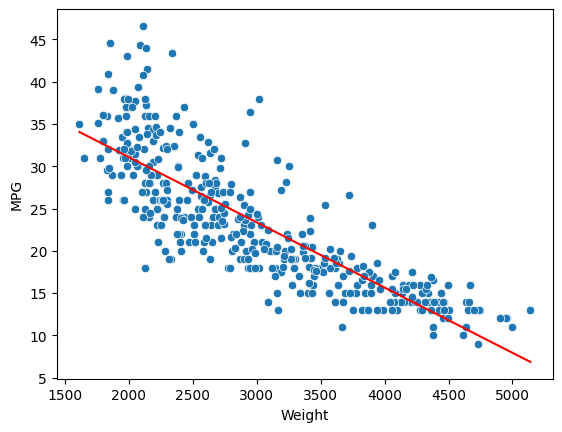

In [ ]:
y_predict=reg.predict(dataset['Weight'].values.reshape(-1,1))
sns.scatterplot(data=dataset,x='Weight',y='MPG')
sns.lineplot(x=dataset['Weight'].values,y=y_predict,color='red')

## choose different feature and compare the score

In [ ]:
X_horsepower_train=X_train['Horsepower'].values
X_horsepower_test=X_test['Horsepower'].values

In [ ]:
from sklearn.linear_model import LinearRegression
reg_horsepower = LinearRegression().fit(X_horsepower_train.reshape(-1,1), y_train)
reg_horsepower.score(X_horsepower_test.reshape(-1,1), y_test)

0.570284027419133

In [ ]:
print("slope",reg_horsepower.coef_)
print("intercept",reg_horsepower.intercept_)

slope [-0.16143643]
intercept 40.47871464402497


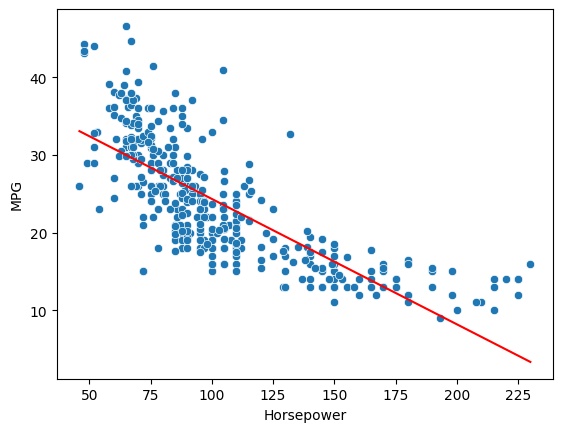

In [ ]:
fig=sns.scatterplot(data=dataset,x='Horsepower',y='MPG')

x_vals = np.linspace(min(dataset['Horsepower']), max(dataset['Horsepower']), 100)
y_vals = reg_horsepower.coef_ * x_vals + reg_horsepower.intercept_

plt.plot(x_vals, y_vals, color='red')

# use multi-variable input to fit linear regression model

In [ ]:
X_train.head(2)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
201,6,250.0,110.0,3645.0,16.2,76,False,False,True
223,8,318.0,145.0,4140.0,13.7,77,False,False,True


In [ ]:
y_train.head(2)

201    18.5
223    15.5
Name: MPG, dtype: float64

In [ ]:
reg_multi=LinearRegression().fit(X_train,y_train)
reg_multi.score(X_test,y_test)

0.8097534101518715

# use Normalized multi-variable input to fit linear regression model

In [ ]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
df=dataset.drop(columns=['MPG','Europe', 'Japan', 'USA'])
data_tf=standardscaler.fit_transform(df)
df_scaled=pd.DataFrame(data_tf,columns=df.columns)
df_scaled[['Europe', 'Japan', 'USA','MPG']]=dataset[['Europe', 'Japan', 'USA','MPG']]
df_scaled.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,False,False,True,18.0
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,False,False,True,15.0
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,False,False,True,18.0
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,False,False,True,16.0
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,False,False,True,17.0


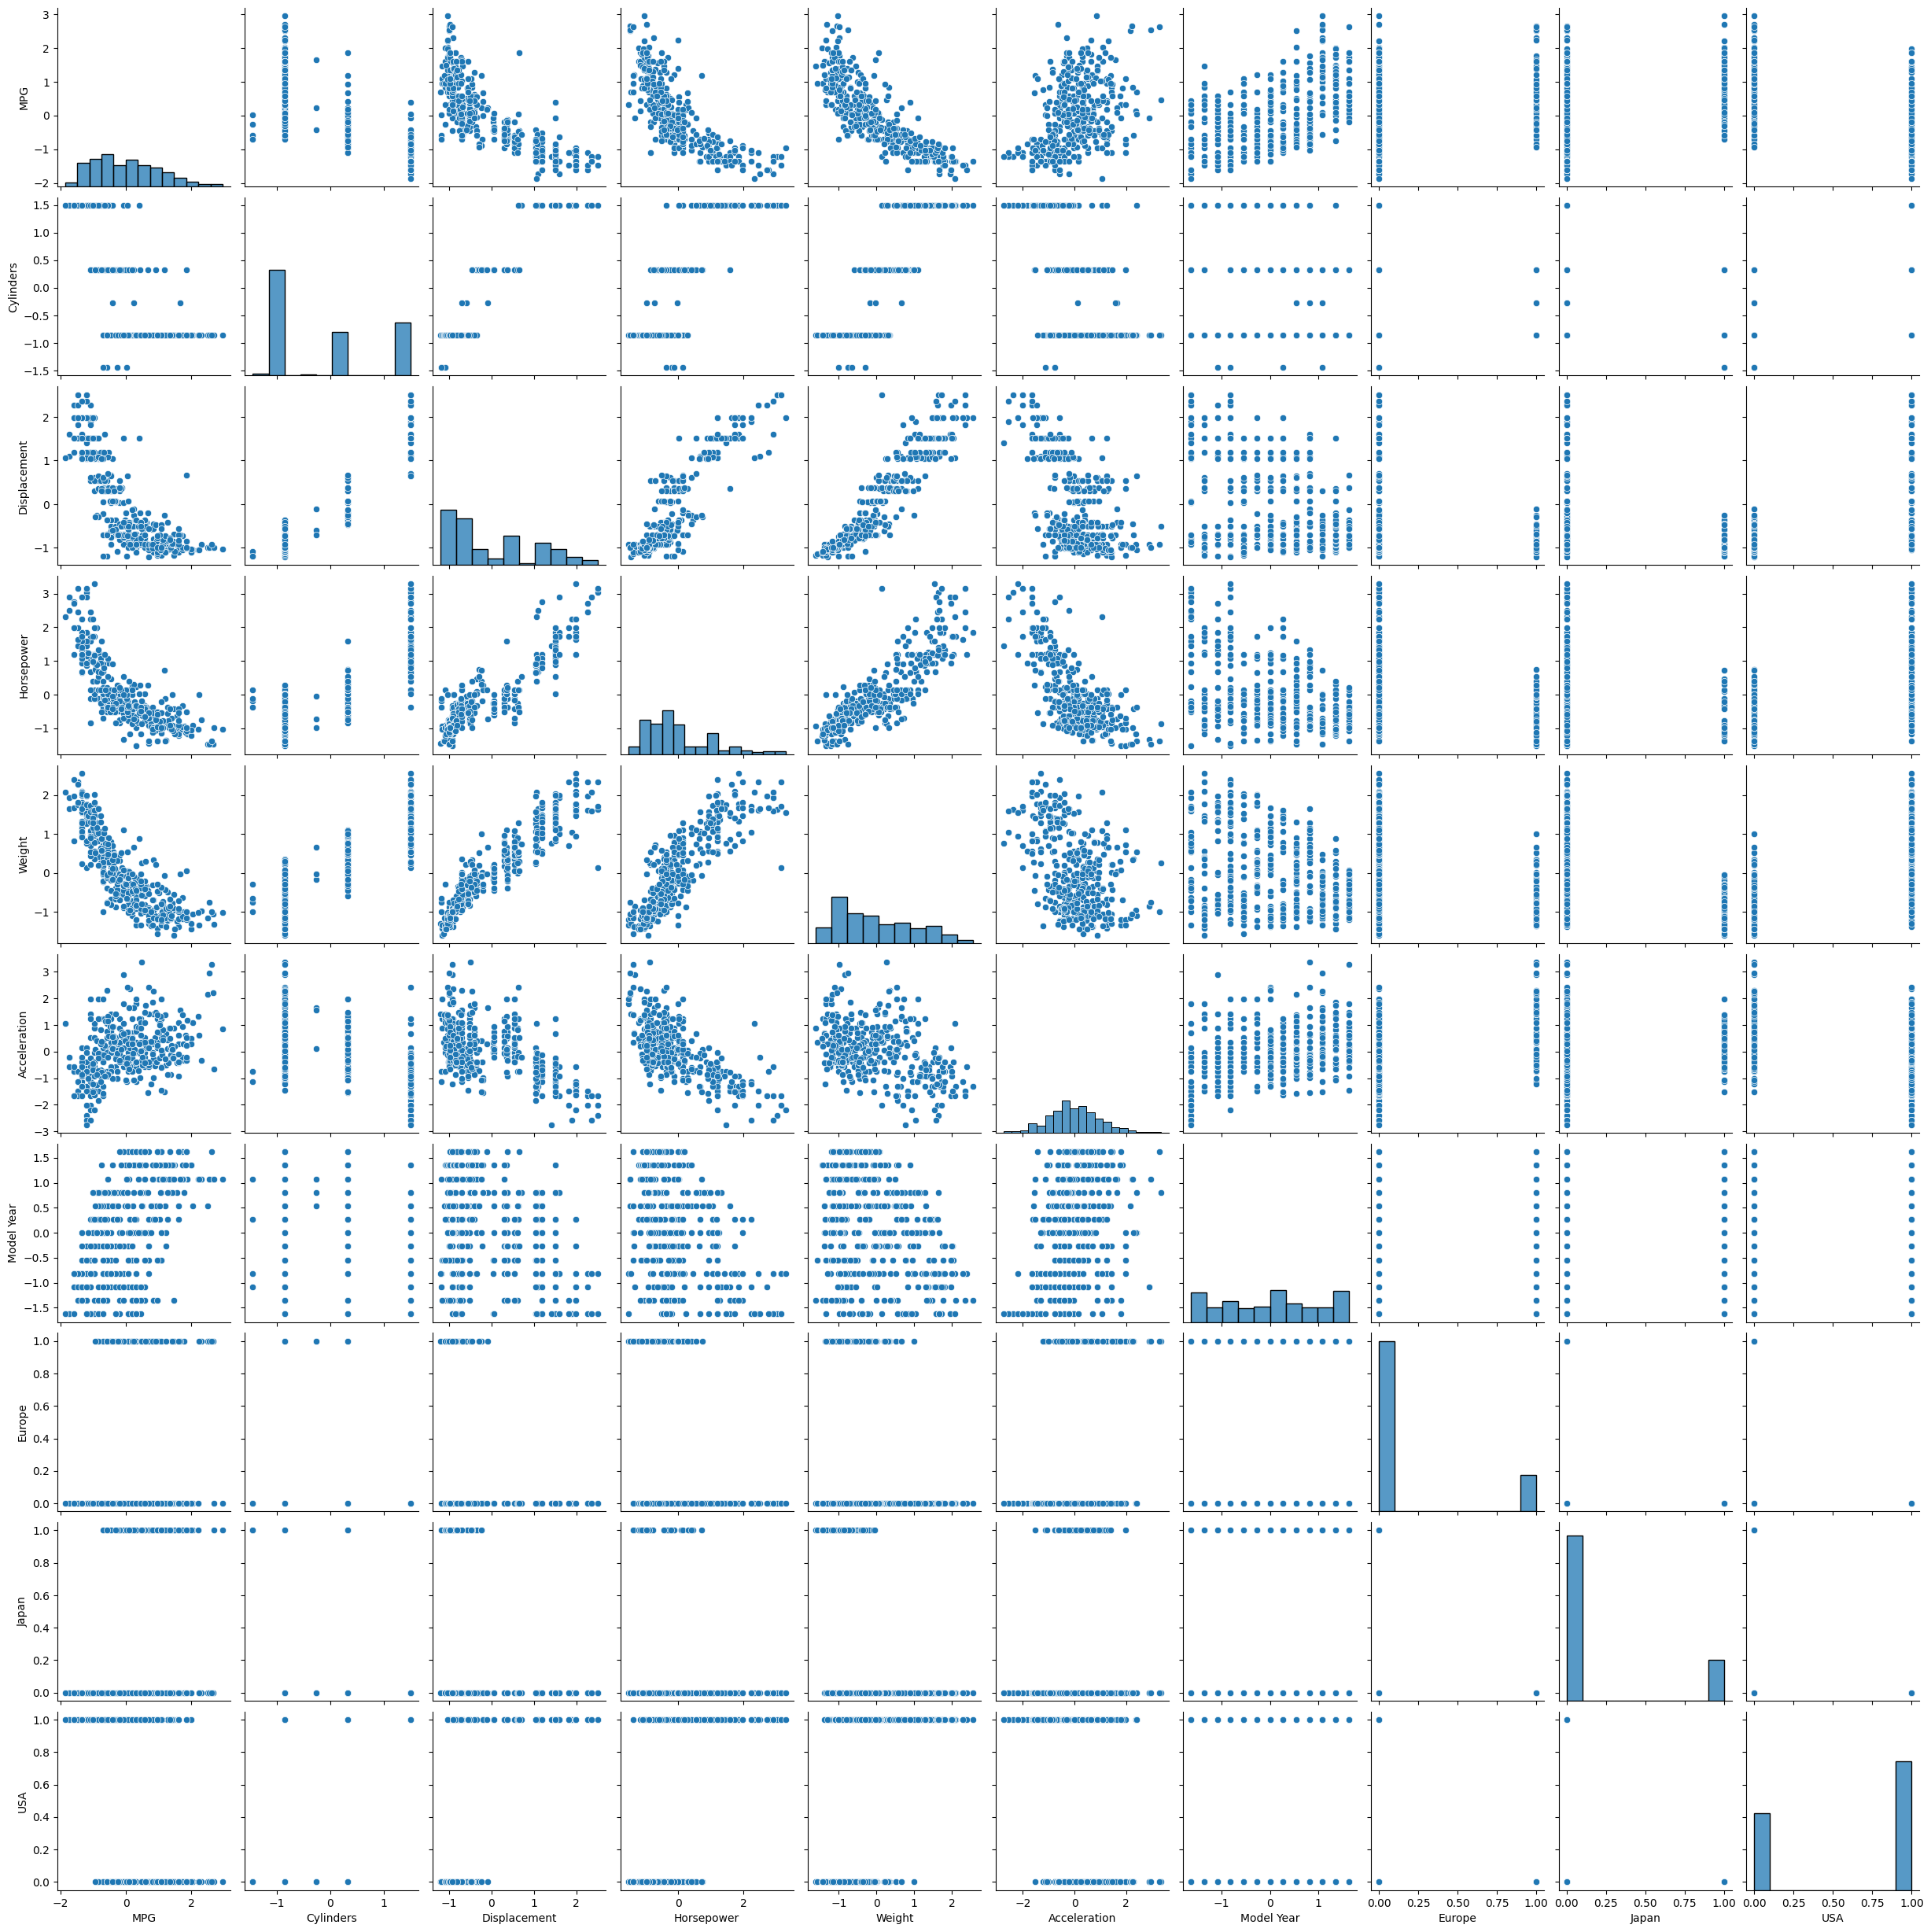

In [ ]:
sns.pairplot(df_scaled)

In [ ]:
X_scaled=df_scaled[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year','Europe','Japan','USA']]
y_scaled=df_scaled['MPG']

In [ ]:
from sklearn.model_selection import train_test_split


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=100)

In [ ]:
reg_scaled=LinearRegression().fit(X_train_scaled,y_train_scaled)
reg_scaled.score(X_test_scaled,y_test_scaled)

0.8426875672226158